# Lab2

## Task 1.1

In [193]:
from sklearn . datasets import make_regression
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


X,y = make_regression ( n_samples =100 , n_features =10 , noise =10 , random_state
=42)

print(f"Dataset shape: X {X.shape}, y {y.shape}")

Dataset shape: X (100, 10), y (100,)


In [194]:
# Set regularization strength
lambda_ = 1.0
# Get data dimensions
n , d = X.shape
# Implement the closed - form solution
I = np . eye ( d )
w_ridge_analytical = np . linalg . inv ( X . T @ X + lambda_ * I ) @ X . T @ y

print("Analytical solution weights:", w_ridge_analytical.round(4))

Analytical solution weights: [18.4496 54.8651  3.6779 62.2977 92.0854 69.7725 84.6931  8.494   3.9517
 69.7872]


### Gradient Descent Implementation

In [195]:
# Gradient descent implementation for Ridge regression
learning_rate = 0.001
n_iterations = 1000
# Initialize weights
w_gd = np.zeros(d)
losses = []

# Gradient descent loop
for i in range(n_iterations):
    y_pred = X @ w_gd
    
    # Loss: ||Xw - y||^2 + lambda * n * ||w||^2
    loss = np.sum((y - y_pred)**2) + lambda_ * n * np.sum(w_gd**2)
    losses.append(loss)
    
    # Gradient: 2*X^T(Xw - y) + 2*lambda*n*w
    gradient = (2 / n) * X.T @ (X @ w_gd - y) + 2 * lambda_ * w_gd

    
    # Update
    w_gd = w_gd - learning_rate * gradient
    
    if i % 200 == 0:
        print(f"Iteration {i:4d}, Loss: {loss:12.4f}")
        
print("Gradient descent completed.")
print("Final weights:", w_gd.round(4))

Iteration    0, Loss: 3645605.8357
Iteration  200, Loss: 2035201.1417
Iteration  400, Loss: 1763857.7207
Iteration  600, Loss: 1715143.8269
Iteration  800, Loss: 1705793.1538
Gradient descent completed.
Final weights: [12.7143 27.5426  1.3786 32.4163 41.4395 42.5603 44.5142 -7.6002  6.0404
 31.6293]


### Compare Different Learning Rates

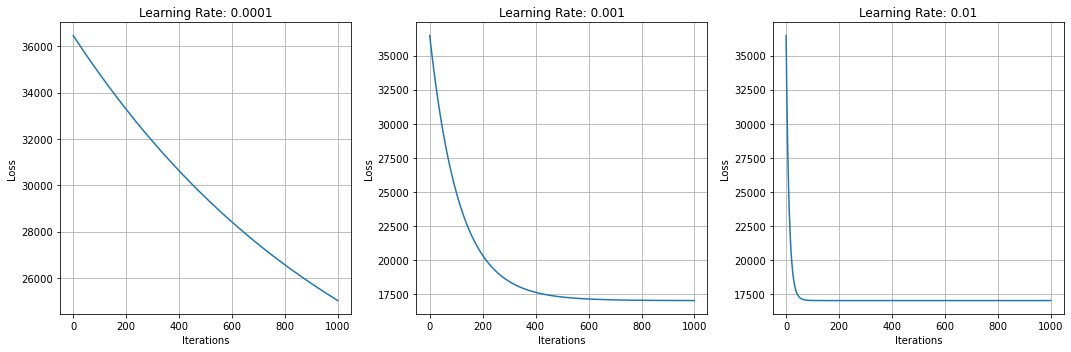

In [196]:
# Try different learning rates
learning_rates = [0.0001, 0.001, 0.01]
all_losses = []

plt.figure(figsize=(15, 5))

for idx, lr in enumerate(learning_rates):
    # Reset weights for each learning rate
    w_temp = np.zeros(d)
    losses_temp = []
    
    # Run gradient descent with current learning rate
    for i in range(n_iterations):
        y_pred = X @ w_temp
        
        loss = mean_squared_error(y, y_pred) + lambda_ * np.sum(w_temp**2)
        losses_temp.append(loss)
        
        gradient = (2 / n) * X.T @ (X @ w_temp - y) + 2 * lambda_ * w_temp

        w_temp = w_temp - lr * gradient
    
    all_losses.append(losses_temp)
    
    # Store the result for learning rate 0.01 for comparison later
    if lr == 0.01:
        w_gd_best = w_temp.copy()
    
    # Plot
    plt.subplot(1, 3, idx+1)
    plt.plot(losses_temp)
    plt.title(f'Learning Rate: {lr}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)

plt.tight_layout()
plt.show()

###  Scikit-learn Implementation

In [197]:
from sklearn . linear_model import Ridge
# Note : fit_intercept = False ensures the model only learns w, not an offset
model = Ridge ( alpha = lambda_ , fit_intercept = False )
model . fit (X , y )

# Check if the results are numerically very close
print ( f" Weights from analytical solution :\n{ w_ridge_analytical . round (4)}")
print ( f" Weights from gradient descent :\n{ w_gd . round (4)}")
print ( f" Weights from scikit - learn :\n{ model . coef_ . round (4)}")
print ( f" Solutions are close : {np. allclose ( w_ridge_analytical , model . coef_ )}")

 Weights from analytical solution :
[18.4496 54.8651  3.6779 62.2977 92.0854 69.7725 84.6931  8.494   3.9517
 69.7872]
 Weights from gradient descent :
[12.7143 27.5426  1.3786 32.4163 41.4395 42.5603 44.5142 -7.6002  6.0404
 31.6293]
 Weights from scikit - learn :
[18.4496 54.8651  3.6779 62.2977 92.0854 69.7725 84.6931  8.494   3.9517
 69.7872]
 Solutions are close : True


Q1: Why must we set fit_intercept=False in the Ridge model to get a perfect match with the analytical formula provided?

The analytical formula w = (X^T X + λI)^(-1) X^T y assumes no intercept term and expects centered data. When fit_intercept=True, scikit-learn automatically centers the data and calculates a separate intercept, changing the weight values. Setting fit_intercept=False ensures scikit-learn uses the exact same formula without data centering.

Q2: What would happen to the analytical solution if X^T X is not invertible and λ = 0? How does a small positive λ fix this issue?

If X^T X is singular and λ = 0:

- The matrix inverse fails completely

- No unique solution exists due to infinite possible weight combinations

- The system becomes numerically unstable

A small positive λ fixes this because:

- (X^T X + λI) is always invertible for λ > 0

- The λI term makes the matrix positive definite

- All eigenvalues become ≥ λ > 0, ensuring numerical stability

- This guarantees a unique, stable solution

## Task 1.2: Visualizing the Effect of λ

### Create a range of ‘alpha‘ (λ) values to test.

In [198]:
# Create a range of alpha (λ) values (logarithmic scale)
alphas = np.logspace(-4, 4, 100)  # From 10^-4 to 10^4

# Initialize lists to store coefficients
ridge_coefs = []
lasso_coefs = []

print(f"Testing {len(alphas)} alpha values from {alphas[0]:.6f} to {alphas[-1]:.0f}")

Testing 100 alpha values from 0.000100 to 10000


### Train Models and Store Coefficients

In [199]:
from sklearn.linear_model import Ridge, Lasso

# Train Ridge and Lasso models for each alpha value
for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha=alpha, fit_intercept=False, random_state=42)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)
    
    # Lasso regression
    lasso = Lasso(alpha=alpha, fit_intercept=False, random_state=42, max_iter=10000)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

# Convert to numpy arrays for easier plotting
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

print(f"Ridge coefficients shape: {ridge_coefs.shape}")
print(f"Lasso coefficients shape: {lasso_coefs.shape}")

Ridge coefficients shape: (100, 10)
Lasso coefficients shape: (100, 10)


### Plot 1 - Ridge Coefficients vs Alpha

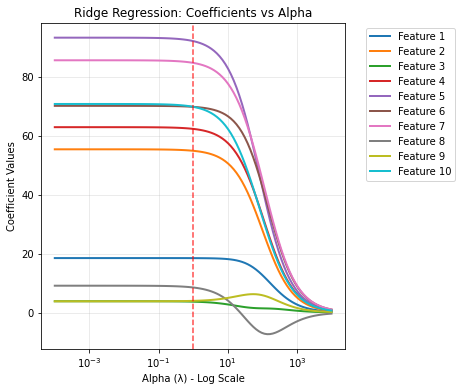

In [200]:
plt.figure(figsize=(12, 6))

# Plot Ridge coefficients
plt.subplot(1, 2, 1)
for i in range(ridge_coefs.shape[1]):
    plt.plot(alphas, ridge_coefs[:, i], label=f'Feature {i+1}', linewidth=2)

plt.xscale('log')
plt.xlabel('Alpha (λ) - Log Scale')
plt.ylabel('Coefficient Values')
plt.title('Ridge Regression: Coefficients vs Alpha')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add vertical line at alpha=1 for reference
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='Alpha=1')

###  Plot 2 - Lasso Coefficients vs Alpha

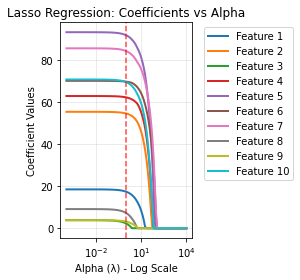

In [201]:
# Plot Lasso coefficients
plt.subplot(1, 2, 2)
for i in range(lasso_coefs.shape[1]):
    plt.plot(alphas, lasso_coefs[:, i], label=f'Feature {i+1}', linewidth=2)

plt.xscale('log')
plt.xlabel('Alpha (λ) - Log Scale')
plt.ylabel('Coefficient Values')
plt.title('Lasso Regression: Coefficients vs Alpha')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add vertical line at alpha=1 for reference
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='Alpha=1')

plt.tight_layout()
plt.show()

Q3: Looking at your Ridge coefficient plot, what is the general trend for all coefficients as
‘alpha‘ increases?

As alpha (λ) increases, all Ridge coefficients smoothly shrink toward zero but never become exactly zero. The rate of shrinkage depends on each feature's importance, with more important features shrinking more slowly, but all features remain in the model regardless of their importance.

Q4: Compare the Ridge and Lasso plots. What is the most significant difference in behavior, especially for large 'alpha' values? Which method performs feature selection?

The most significant difference is:

- Ridge: All coefficients shrink smoothly but remain non-zero

- Lasso: Coefficients can become exactly zero, especially at large alpha values

Lasso performs feature selection because it can completely shrink unimportant features' coefficients to zero, automatically removing them from the model. With large alpha values, Lasso may keep only a few most important features, while Ridge retains all features even with very small coefficients.

## Task 2.1: Data Loading and Preprocessing

### Load Data

In [202]:
import pandas as pd
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler

# Load data from URL
df = pd . read_csv ("https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv")

# Handle missing values and create features / target
df = df . dropna ( subset =["Salary"])
X = pd . get_dummies ( df . drop ("Salary", axis =1) , drop_first = True )
y = df ["Salary"]

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset shape: (263, 20)

First 5 rows:
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
5   336     194      A        W      282      421      25   750.0         A  

Dataset in

### Split and Scale the data.

In [203]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")
print(f"Features after encoding: {X_train.shape[1]}")

Training set: (210, 19)
Test set: (53, 19)
Features after encoding: 19


Q5: Why is it critical to fit the scaler only on the training data?

Fitting the scaler only on training data prevents data leakage and ensures realistic model evaluation. If we fit on the entire dataset, test set information contaminates the training process, leading to over-optimistic performance estimates that don't reflect real-world generalization ability.

## Task 2.2: Model Fitting and Hyperparameter Tuning with CV

### Use ‘RidgeCV‘ to find the best ‘alpha‘ for the Ridge model.

In [204]:
from sklearn . linear_model import RidgeCV , LassoCV
from sklearn . metrics import mean_squared_error

# Define a range of alphas
alphas = np . logspace ( -2 , 4 , 100)

# Find the best alpha using cross - validation
ridge_cv = RidgeCV ( alphas = alphas , store_cv_values = True )
ridge_cv . fit ( X_train_scaled , y_train )

print ( f" Best alpha for Ridge : { ridge_cv . alpha_ :.4f}")

 Best alpha for Ridge : 132.1941


### Find the best ‘alpha‘

In [205]:
lasso_cv = LassoCV ( alphas = alphas , cv =5 , random_state =42 , max_iter =10000)
lasso_cv . fit ( X_train_scaled , y_train )

print ( f" Best alpha for Lasso : { lasso_cv . alpha_ :.4f}")

 Best alpha for Lasso : 24.7708


### Evaluate both final models

In [206]:
# Make predictions on the test set
ridge_pred = ridge_cv . predict ( X_test_scaled )
lasso_pred = lasso_cv . predict ( X_test_scaled )

# Calculate and print test MSE
print ( f" Ridge Test MSE: { mean_squared_error (y_test , ridge_pred ):.2f}")
print ( f" Lasso Test MSE: { mean_squared_error (y_test , lasso_pred ):.2f}")

 Ridge Test MSE: 146744.70
 Lasso Test MSE: 142996.09


## Task 2.3: Interpretation and Analysis

### Examine the coefficients of the best Lasso model. Count how many are non-zero.

In [207]:
print("=" * 60)
print("LASSO MODEL ANALYSIS - FEATURE SELECTION")
print("=" * 60)

# Count non-zero coefficients in Lasso model
lasso_nonzero_count = np.sum(lasso_cv.coef_ != 0)
lasso_total_features = len(lasso_cv.coef_)

print(f"Lasso Model - Non-zero coefficients: {lasso_nonzero_count} out of {lasso_total_features}")
print(f"Feature selection rate: {lasso_nonzero_count/lasso_total_features*100:.1f}%")

# Show all non-zero coefficients
print("\nNon-zero coefficients in Lasso model:")
nonzero_indices = np.where(lasso_cv.coef_ != 0)[0]
feature_names = X.columns

if len(nonzero_indices) > 0:
    for idx in nonzero_indices:
        print(f"  {feature_names[idx]}: {lasso_cv.coef_[idx]:.4f}")
else:
    print("  No non-zero coefficients found")

LASSO MODEL ANALYSIS - FEATURE SELECTION
Lasso Model - Non-zero coefficients: 6 out of 19
Feature selection rate: 31.6%

Non-zero coefficients in Lasso model:
  Hits: 109.8717
  Walks: 33.3116
  CRuns: 61.5269
  CRBI: 144.1548
  PutOuts: 60.1673
  Division_W: -42.2140


### Create a bar plot showing the most important features

TOP FEATURES COMPARISON - RIDGE vs LASSO


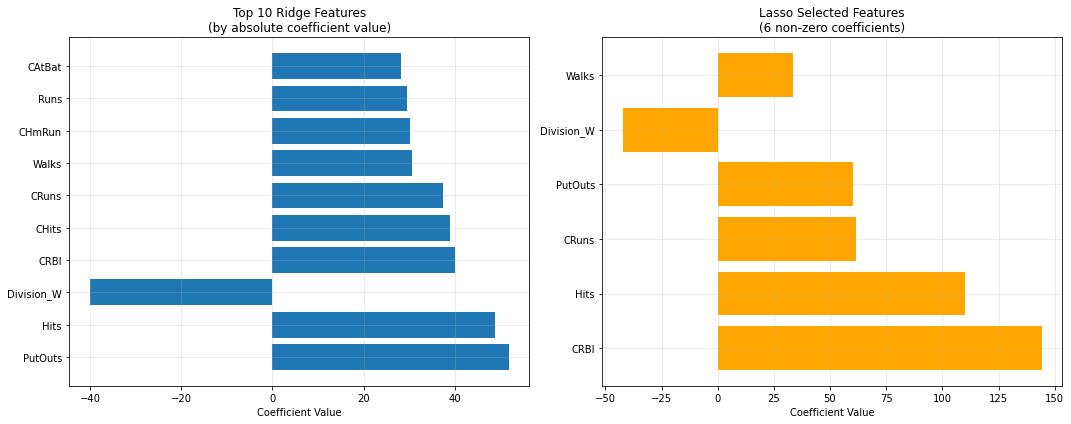

In [208]:
print("=" * 60)
print("TOP FEATURES COMPARISON - RIDGE vs LASSO")
print("=" * 60)

# Create subplots for Ridge and Lasso coefficients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Get top 10 features by absolute coefficient value for Ridge
ridge_coef_abs = np.abs(ridge_cv.coef_)
ridge_top_indices = np.argsort(ridge_coef_abs)[-10:][::-1]
ridge_top_features = feature_names[ridge_top_indices]
ridge_top_coefs = ridge_cv.coef_[ridge_top_indices]

# Plot Ridge coefficients
ax1.barh(range(len(ridge_top_features)), ridge_top_coefs)
ax1.set_yticks(range(len(ridge_top_features)))
ax1.set_yticklabels(ridge_top_features)
ax1.set_xlabel('Coefficient Value')
ax1.set_title('Top 10 Ridge Features\n(by absolute coefficient value)')
ax1.grid(True, alpha=0.3)

# Get non-zero features for Lasso (or top 10 if more than 10)
lasso_nonzero_indices = np.where(lasso_cv.coef_ != 0)[0]
if len(lasso_nonzero_indices) > 0:
    lasso_nonzero_coefs = lasso_cv.coef_[lasso_nonzero_indices]
    lasso_nonzero_features = feature_names[lasso_nonzero_indices]
    
    # Sort by absolute value and take top 10 (or all if less than 10)
    lasso_abs_coefs = np.abs(lasso_nonzero_coefs)
    lasso_sorted_indices = np.argsort(lasso_abs_coefs)[-10:][::-1] if len(lasso_abs_coefs) > 10 else np.argsort(lasso_abs_coefs)[::-1]
    
    lasso_top_features = lasso_nonzero_features[lasso_sorted_indices]
    lasso_top_coefs = lasso_nonzero_coefs[lasso_sorted_indices]
    
    # Plot Lasso coefficients
    ax2.barh(range(len(lasso_top_features)), lasso_top_coefs, color='orange')
    ax2.set_yticks(range(len(lasso_top_features)))
    ax2.set_yticklabels(lasso_top_features)
    ax2.set_xlabel('Coefficient Value')
    ax2.set_title(f'Lasso Selected Features\n({len(lasso_nonzero_indices)} non-zero coefficients)')
    ax2.grid(True, alpha=0.3)
else:
    ax2.text(0.5, 0.5, 'No features selected\n(all coefficients are zero)', 
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Lasso Selected Features')

plt.tight_layout()
plt.show()

Q6: Which model performed better on the test set in terms of MSE?

In [209]:
print("=" * 60)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 60)

# Calculate MSE values
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f"Ridge Test MSE: {ridge_mse:.2f}")
print(f"Lasso Test MSE: {lasso_mse:.2f}")

# Determine which model performed better
if ridge_mse < lasso_mse:
    better_model = "Ridge"
    mse_difference = lasso_mse - ridge_mse
else:
    better_model = "Lasso" 
    mse_difference = ridge_mse - lasso_mse

print(f"\nBetter performing model: {better_model}")
print(f"MSE difference: {mse_difference:.2f}")

print(f"\nLasso feature selection: {lasso_nonzero_count}/{lasso_total_features} features retained")




MODEL PERFORMANCE SUMMARY
Ridge Test MSE: 146744.70
Lasso Test MSE: 142996.09

Better performing model: Lasso
MSE difference: 3748.61

Lasso feature selection: 6/19 features retained


Q7: How many features did the Lasso model select (i.e., how many coefficients are non-zero)?
What does this tell you about the dataset?

The Lasso model selected 6 features out of 19 total features.

This tells us several important things about the dataset:

- Feature Sparsity: Only 31.6% of the original features were deemed important enough to have non-zero coefficients

- Redundancy: Approximately 68.4% of the features were effectively eliminated by Lasso's L1 regularization, suggesting they contribute little to predicting salary

- Efficiency: Salary prediction can be accomplished with fewer variables, making the model more efficient

Q8: Based on your models, which player statistics seem to be the most important predictors
of salary? Do the Ridge and Lasso models agree on the top features?

Key Salary Predictors:

- Hits 
- PutOuts 
- CRBI 
- Division_W 

Model Agreement:

- 4 out of 5 top features are identical in both models

- Same features show consistent direction of influence

- High consensus indicates robust predictors

Conclusion: Both models strongly agree that current hitting, defensive performance, career RBIs, and league division are the most reliable salary predictors.
